

*  Import Libraries and Generate Sample Data



make_blobs is a function that quickly generates synthetic datasets with a specific structure. It creates data that is grouped around different centers, making it ideal for clustering exercises.
By using it, we can generate data with a known number of clusters, which is useful for testing how well clustering algorithms, like KMeans, can find those clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

n_samples- total number of data points to generate.

centers- Indicates the number of distinct clusters or groups we want in the dataset. make_blobs will randomly place 4 centers and distribute the data around these centers.

cluster_std=1.0: Controls the standard deviation (spread or compactness) of the clusters. A lower value (e.g., 0.5) makes clusters tighter, while a higher value (e.g., 2.0) spreads them out more.

Here, X is an array of shape (300, 2){(samples, dimensions)} . It contains the coordinates of each data point in a two-dimensional space. Each row in X represents one sample, with two values (columns) for its x and y coordinates.

y is an array of shape (300,). It contains the cluster labels for each data point in X. The values in y range from 0 to 3 (because there are 4 clusters). Each label indicates which cluster a data point belongs to, based on the cluster center it was generated around.

Apply the K-means Algorithm

In [2]:
# Apply K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


Visualize the Clusters

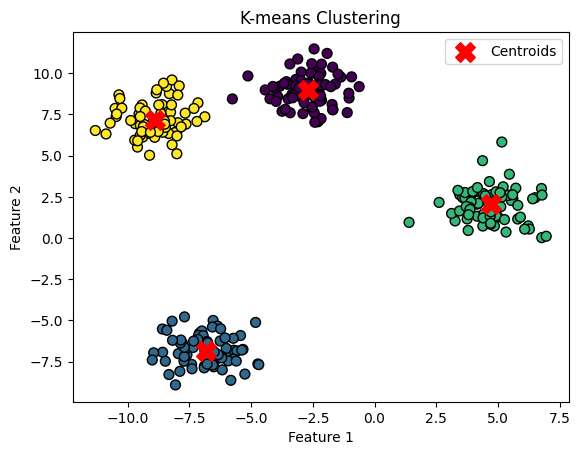

In [3]:
# Plot the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Determine the Optimal Number of Clusters (Using Elbow Method)

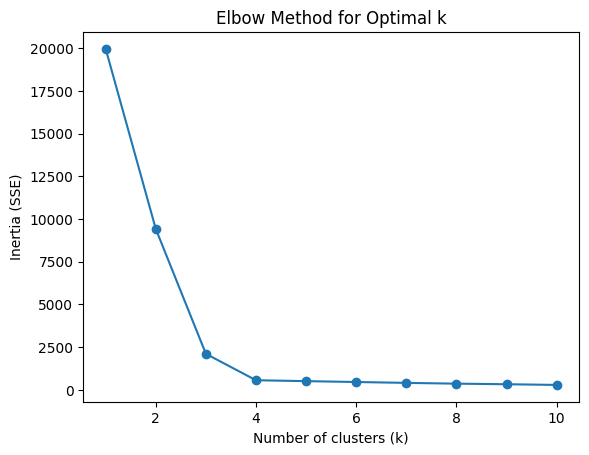

In [4]:
# Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()



Inertia, also known as Sum of Squared Errors (SSE) or Within-Cluster Sum of Squares (WCSS), is a metric used to evaluate the quality of clusters in clustering algorithms like K-means. It measures how tightly clustered the data points are around each cluster’s centroid and is useful in determining how well-defined clusters are

Other method to determine the optimal number for k are Silhouette Score, that measures how similar each data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

To use it, compute the average silhouette score for each value of k and choose the 𝑘 k with the highest score.